In [ ]:
## Confidence Intervals

In [144]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv("loans_income.csv").squeeze('columns')



In [146]:
print("loan_income mean:", loans_income.mean())

np.random.seed(seed=3) 

# create a sample of 20 loan income data (no substitution) and prints the mean:
sample20 = resample(loans_income, n_samples=20, replace=False)
print("sample20 mean: ",sample20.mean())



loan_income mean: 68760.51844
sample20 mean:  55734.1


In [148]:
# then we resample 500 times those 20 values (with substitution, in batches of 20 values), and collect all their means

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())

# transform that into a pandas Series:
results = pd.Series(results)

#results

Performs bootstrap resampling:

    Takes 500 resamples (with replacement) from sample20.
    For each resample, computes the mean and appends it to the results list.

Converts the list of means into a Pandas Series for easier processing and visualization.

In [151]:
# Computes the 90% confidence interval for the bootstrap means by taking the 5th and 95th percentiles of the results:
confidence_interval = list(results.quantile([0.05, 0.95]))

In [157]:
confidence_interval


[43212.45, 70233.43999999999]

## Visualization 1


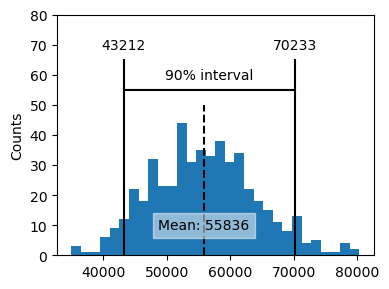

In [179]:
# Plots a histogram of the bootstrap means using 30 bins
ax = results.plot.hist(bins=30, figsize=(4, 3))


# Confidence Interval Lines:

#   Adds horizontal and vertical lines to mark the 90% confidence interval on the plot.
#   Labels the confidence interval bounds.
ax.plot(confidence_interval, [55, 55], color='black')


for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
    

#Adds a label in the middle of the confidence interval to indicate it's a "90% interval":
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')


# Mean annotation:

#     Calculates the mean of the bootstrap means and marks it with a dashed vertical line.
meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')

#     Annotates the mean with a text label.
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')


# Final Touches:
#    Adjusts the y-axis limits for better visualization.
#    Sets a y-axis label ("Counts") to indicate the histogram represents the frequency of bootstrap means.
#    Ensures the layout looks good and displays the plot.

ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

# Adjust the padding between and around subplots.
plt.tight_layout()
# Display all open figures.
plt.show()

Text(0, 0.5, 'Counts')

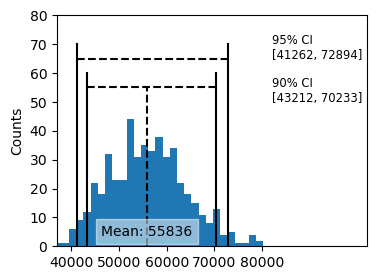

In [281]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)


# Annotates the plot with the numerical values of the 90% confidence interval 
# at an approximate position (82000, 50) on the plot.

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')  #C1 = orange
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')

for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
    
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')


# Re-calculates the confidence interval, now using the 95% level 
# (from the 2.5th to the 97.5th percentile).
# Overlays the 95% confidence interval on a new histogram, marking the bounds with dashed lines.


confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

# calculating the mean
meanIncome = results.mean()

# plotting the mean
ax.plot([meanIncome, meanIncome], [0, 55], color='black', linestyle='--')

# plotting the text
# bbox manages that little box that contains "Mean"

ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')


ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()



Two Confidence Intervals:

    The code calculates and visualizes both 90% and 95% confidence intervals.
    This demonstrates how increasing the confidence level widens the interval, reflecting more uncertainty.

    

## Taking it apart:

I'm here taking that code apart, as it's made of 2 layers.

(37000.0, 102000.0)

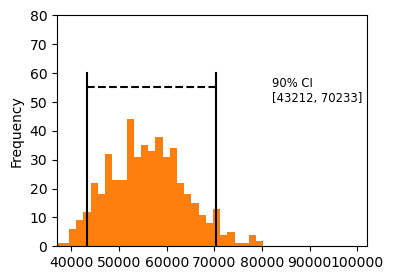

In [285]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)


# Annotates the plot with the numerical values of the 90% confidence interval 
# at an approximate position (82000, 50) on the plot.

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')  #C1 = orange
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')

for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
    
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

# I added these lines to create the same plot space for this "taken apart" version
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)

# Re-calculates the confidence interval, now using the 95% level 
# (from the 2.5th to the 97.5th percentile).
# Overlays the 95% confidence interval on a new histogram, marking the bounds with dashed lines.




Text(0, 0.5, 'Counts')

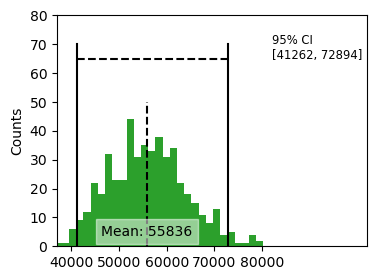

In [307]:
confidence_interval = list(results.quantile([0.025, 0.975]))

ax = results.plot.hist(bins=30, figsize=(4, 3), color='C2')

# Plots the "--" line:
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')

# Plots the vertical lines (for the 2x edge points):
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')

#  the text
ax.text(82000, 65, 
      f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]', fontsize='small')



# Calculating the mean
meanIncome = results.mean()

# Plotting the mean (and the little half-transparent rectangle):
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# setting the limits for the axes, in order to widen the frame of the plot:
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)

# setting the ticks on the x-axis
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
# setting the y-label:
ax.set_ylabel('Counts')

#plt.tight_layout()
#plt.show()
